В помощь тем кто проходит модуль "Статистика" на курсе "Аналитик данных" karpov.courses. Держитесь, братья и сестры!

### Разбираемся с законом больших чисел и центральной предельной теоремой

[1. Закон больших чисел - средние выборок из распределения сходятся к среднему распределения с увеличением размера выборки](#1)

[2. Немного изменим вид графика и проверим закон больших чисел для разных распределений](#2)

[3. Центральная предельная теорема: средние выборок распределены нормально, среднее средних сходится к среднему генеральной совокупности, а стандартная ошибка много меньше стандартного отклонения](#3)

[4. Ошибки первого и второго рода](#4)

[5. Про длинные хвосты](#5)

[6. Почему с увеличением выборки средние распределяются нормально?](#6)

[7. ](#7)

[8. ](#8)

[9. ](#9)


In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from scipy import special
from scipy import stats
sns.set(rc={'figure.figsize' : (12, 5)}, font='verdana')
plt.style.use('dark_background')

<a id="1"></a> Закон больших чисел - средние выборок из распределения сходятся к среднему распределения с увеличением размера выборки

Что мы делаем:

- бросаем монетку: случайно выпадает 1 или 0 с вероятностью 0.5

- считаем среднее для n бросков

- собираем массив из средних для каждого n от 1 до 1001

- выводим график где по оси x число бросков n, а по оси y соответствующее среднее

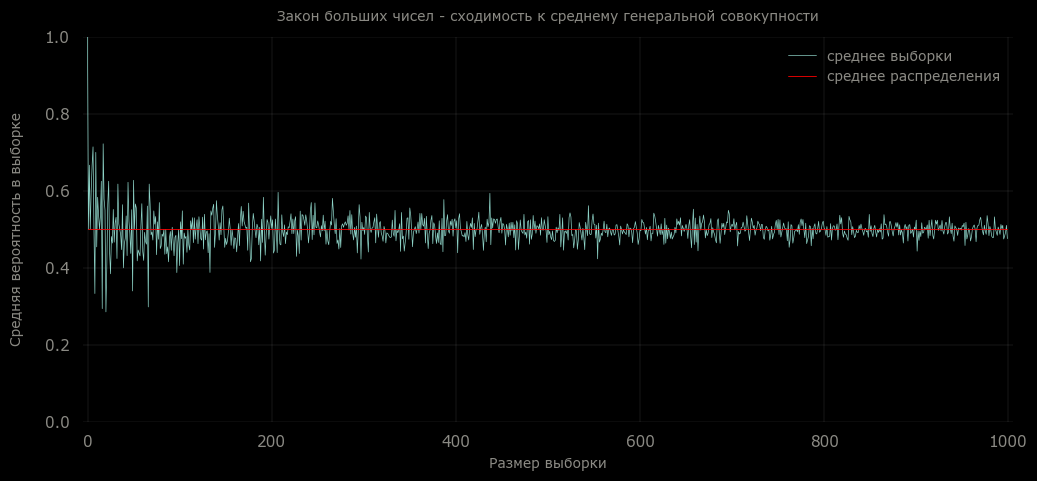

In [164]:
t = pd.Series([np.random.binomial(1,0.5,n).mean() for n in range(1, 1001)])

sns.lineplot(x=t.index, y=t.values, linewidth=0.5, label = 'среднее выборки')
sns.lineplot(x=t.index, y=np.array([0.5]*1000), color = 'red',linewidth=0.6, label = 'среднее распределения')

plt.title('Закон больших чисел - сходимость к среднему генеральной совокупности', fontsize=10, y=1.02, color='#8b8a84')
plt.xlabel("Размер выборки", labelpad = 5, fontsize= 10,  color='#8b8a84')
plt.ylabel('Средняя вероятность в выборке', labelpad = 15, fontsize= 10,  color='#8b8a84')
plt.tick_params(axis='both', colors='#8b8a84')
plt.legend(frameon=False, fontsize='small', labelcolor = '#8b8a84')
plt.ylim(0, 1)
plt.xlim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 
plt.show()

<a id="2"></a> Немного изменим вид графика и проверим закон больших чисел для разных распределений

Создадим несколько распределений: монетку, кубик, расномерное и нормальное и на график будем выводить не само среднее, а накопленное среднее средних - просто график будет прикольнее

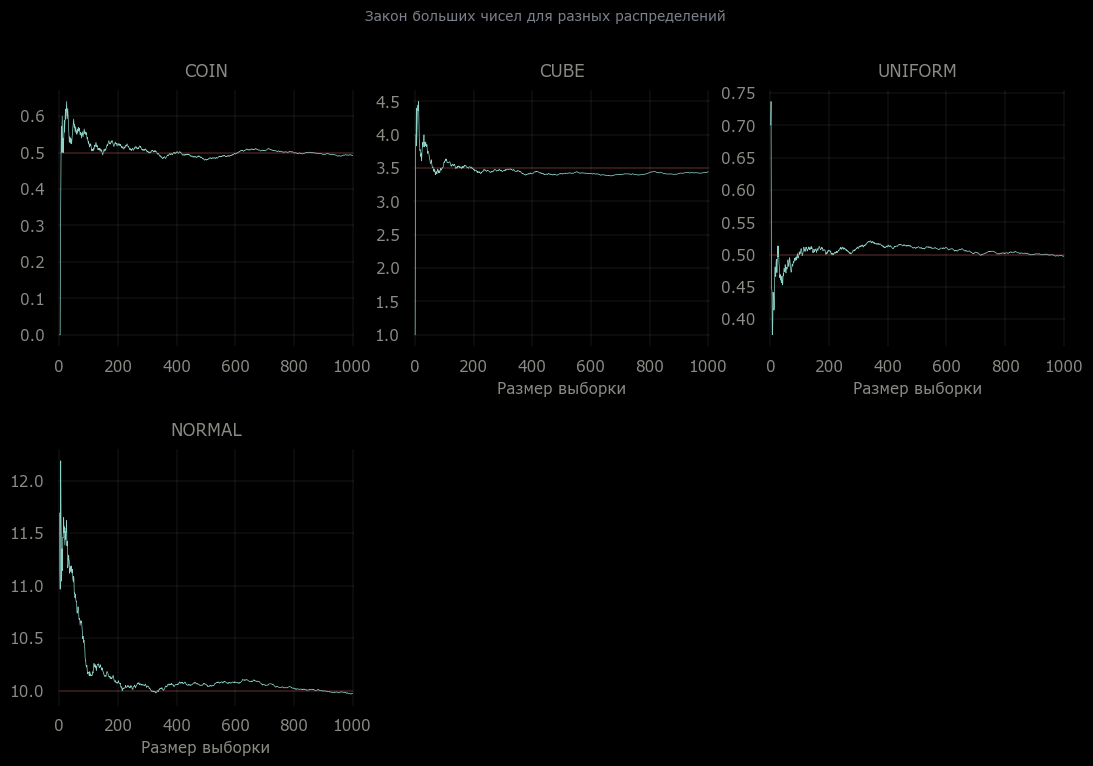

In [22]:
plt.figure(figsize=(13,8))
plt.subplots_adjust(wspace= 0.2, 
                    hspace= 0.4)


plt.suptitle('Закон больших чисел для разных распределений', fontsize=10, color='#7d808d')

plt.subplot(2, 3, 1)
t1 = pd.Series(np.random.binomial(1,0.5,1000)).to_frame()
t1.columns=['res']
t1['csum']=t1['res'].cumsum()
t1['num']=range(1,1001)
t1['cmean']=t1.csum/t1.num

plt.plot(t1.num, t1.cmean, linewidth=0.5)
plt.plot(t1.num, np.array([0.5]*1000), '-r',linewidth=0.3)
plt.title('COIN', fontsize=12, y=1.02, color='#8b8a84')
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(2, 3, 2)
t1 = pd.Series(np.random.randint(1,7,1000)).to_frame()
t1.columns=['res']
t1['csum']=t1['res'].cumsum()
t1['num']=range(1,1001)
t1['cmean']=t1.csum/t1.num
plt.plot(t1.num, t1.cmean, linewidth=0.5)
plt.plot(t1.num, np.array([3.5]*1000), '-r',linewidth=0.3)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('CUBE', fontsize=12, y=1.02,color='#8b8a84')
plt.xlabel("Размер выборки", labelpad = 5, fontsize= 11,color='#8b8a84')
plt.xlim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(2, 3, 3)
t1 = pd.Series(np.random.uniform(size = 1000)).to_frame()
t1.columns=['res']
t1['csum']=t1['res'].cumsum()
t1['num']=range(1,1001)
t1['cmean']=t1.csum/t1.num
plt.plot(t1.num, t1.cmean, linewidth=0.5)
plt.plot(t1.num, np.array([0.5]*1000), '-r',linewidth=0.3)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('UNIFORM', fontsize=12, y=1.02,color='#8b8a84')
plt.xlabel("Размер выборки", labelpad = 5, fontsize= 11,color='#8b8a84')
plt.xlim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(2, 3, 4)
t1 = pd.Series(np.random.normal(10,2,size = 1000)).to_frame()
t1.columns=['res']
t1['csum']=t1['res'].cumsum()
t1['num']=range(1,1001)
t1['cmean']=t1.csum/t1.num

plt.plot(t1.num, t1.cmean, linewidth=0.5)
plt.plot(t1.num, np.array([10]*1000), '-r',linewidth=0.3)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('NORMAL', fontsize=12, y=1.02, color='#8b8a84')
plt.xlabel("Размер выборки", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 


plt.show()

Как видим, с ростом объема выборки (числа экспериментов) среднее выборки сходится к среднему распределения

<a id="3"></a> Центральная предельная теорема: средние выборок распределены нормально, среднее средних сходится к среднему генеральной совокупности, а стандартная ошибка много меньше стандартного отклонения 

In [23]:
p = np.random.normal(100,10,100000)

print(f'среднее распределения:                {p.mean()} \n\
стандартное отклонение распределения: {p.std()}')

среднее распределения:                99.95074527370261 
стандартное отклонение распределения: 10.006903996637533


Обратите внимание: созданное нами нормальное распеределение со средним 100 и отклонением 10 - имеет другое среднее и другое отклонение. Как так? Это потому что наше число экспериментов органичено 100000. И фактически мы не создаем распределение, а из распределения как такового берем выборку из 100000 элементов. И, разумеется, поскольку это выборка, ее параметры е могут совпасть в точности с параметрами распределения.

В этом смысле упражняясь с генераторами случайности мы всегда в качестве распределения берем большую выборку (и называем ее дальше распределением), а в качестве выборки - по сути выборку из выборки (и называем ее выборкой) 

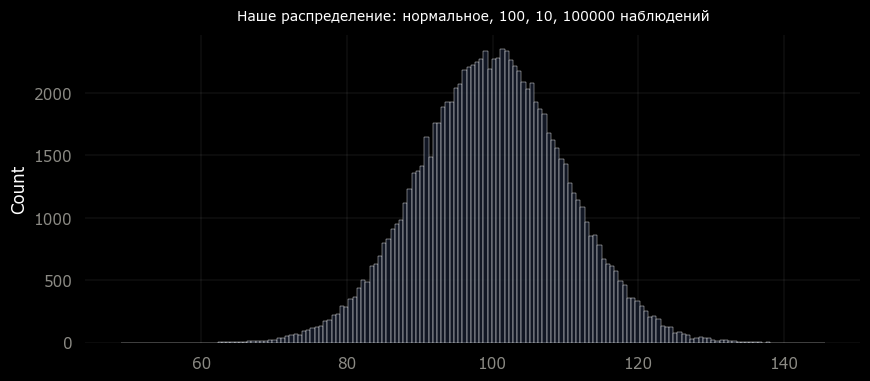

In [24]:
plt.figure(figsize=(10,4))
plt.tick_params(axis='both', colors='#8b8a84')
sns.histplot(p, color='#171e2f')
plt.title('Наше распределение: нормальное, 100, 10, 100000 наблюдений', fontsize=10, y=1.02)

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)

Наберем из распределения средние 10000 выборок по 30 наблюдений

In [26]:
p_samples_means = pd.Series([np.random.choice(p, 30, False).mean() for _ in range(10000)])
print(f'среднее распределения средних выборок:                          {p_samples_means.mean()} \n\
стандартное отклонение распределения средних выборок:           {p_samples_means.std()}\n\
расчетное стандартное отклонение распределения средних выборок: {p.std()/(30**0.5)}    ')


среднее распределения средних выборок:                          99.92687749509925 
стандартное отклонение распределения средних выборок:           1.8180240923461135
расчетное стандартное отклонение распределения средних выборок: 1.8270023499156591    


Отклонение в выборке 10, а отклонение в распределении средних выборок 1,8

То есть, если мы берем просто элемент распределения, то он может оказаться в диапазоне от 60 до 140, а есди берем среднее выбрки из 30 наблюдений, то оно окажется в диапазоне от 94 до 106.

То есть, по выборке мы можем гораздо точнее определить среднее распределения.

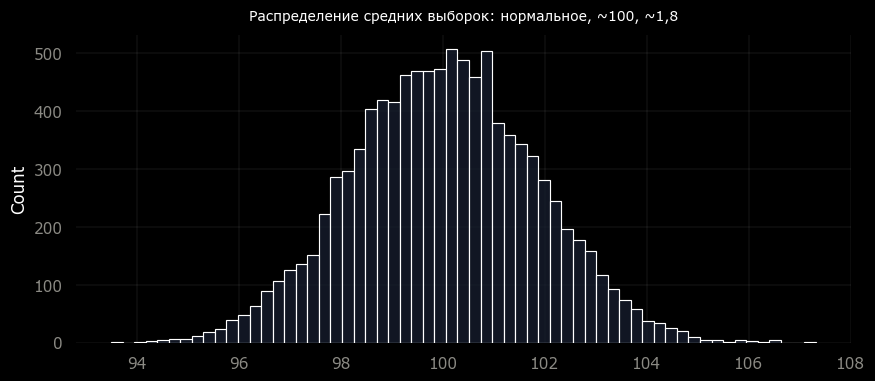

In [48]:
plt.figure(figsize=(10,4))
plt.tick_params(axis='both', colors='#8b8a84')
sns.histplot(p_samples_means, color='#171e2f')
plt.title('Распределение средних выборок: нормальное, ~100, ~1,8', fontsize=10, y=1.02)

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)

Еще раз: значения в распределении у нас разбросаны вокруг 100 от 60 до 140, а средние выборок по 30 наблюдений разбросаны вокруг 100 от 94 до 106

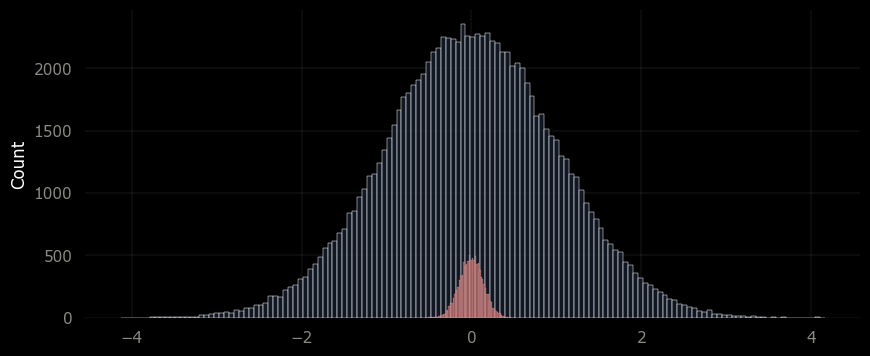

In [ ]:

t2 = np.random.normal(size = 100000)
t_se = [pd.Series(np.random.normal(size = 50)).mean() for _ in range(10000)]
plt.figure(figsize=(10,4))
plt.tick_params(axis='both', colors='#8b8a84')
sns.histplot(t2, color='#171e2f')
sns.histplot(t_se, color='#ba5a58')

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)

То есть если мы берем среднее выборки, то среднее самой совокупности с вероятностью 99% будет на расстоянии трех стандартных ошибок выборки в обе стороны. Другими словами случайная выборка существенно повышает точность обнаружения среднего совокупности по сравнению со значением. Причем увеличение размера выборки повышает точность, уменьшая стандартную ошибку

<a id="4"></a> Теперь немного про ошибки первого и второго рода

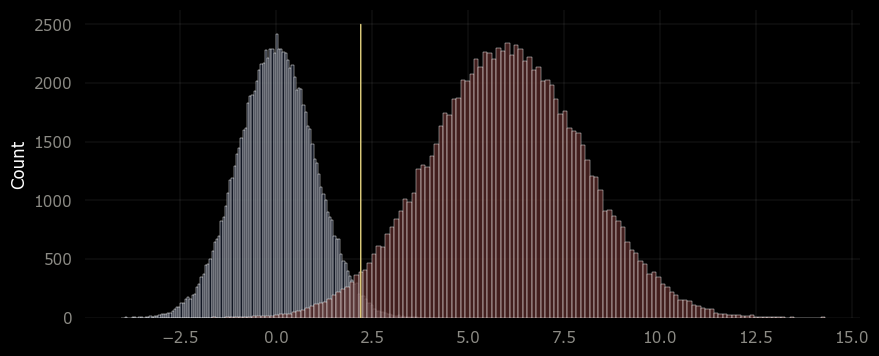

In [19]:
t2 = np.random.normal(size = 100000)
t3 = np.random.normal(6,2,size = 100000)
plt.figure(figsize=(10,4))
plt.tick_params(axis='both', colors='#8b8a84')
sns.histplot(t2, color='#171e2f')
sns.histplot(t3, color='#592927')
plt.plot(np.array([2.2]*2500), np.array(range(2500)), linewidth=1, color='#e5d380')

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)

Слева серое распределение - это распределение нарядов нашей девушки, по оси x - ее гардероб.

Площадь под распределеним за желтой отсечкой - это p-value - вероятность ошибки первого рода.

Ошибка первого рода, это когда мы видим какую-то девушку в наряде, и говорим, что для нашей девушки такой наряд настолько маловероятен, что с вероятность 99,95 это не она. А это она!

Красное распределение справа - это какая-то другая девушка, на наша, со своим диапазоном нарядов, то есть гардеробом.

Ошибка второго рода, это когда мы видим какую-то девушку в наряде, который наша девушка в принципе носит и говорим - это наша девушка. Но с вероятностью в площать под красным распределением слева от желтой отсечки - это другая девушка в похожем наряде.

<a id="5"></a> Про длинные хвосты

Рассмотрим логнормальное распределение

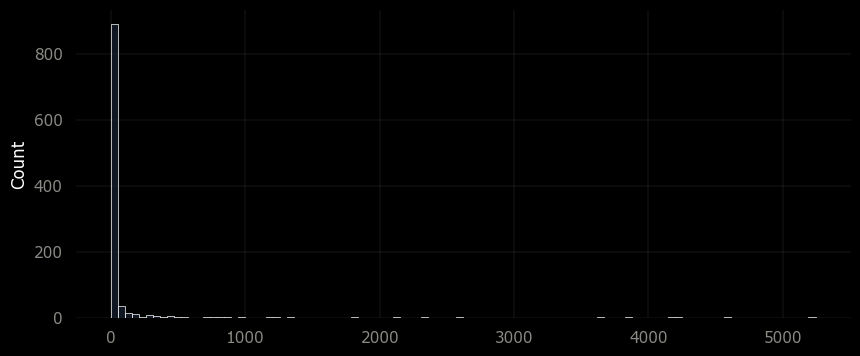

In [119]:
plt.figure(figsize=(10,4))
plt.tick_params(axis='both', colors='#8b8a84')

s = 3
lgnrm = lognorm.rvs(s,size = 1000)

sns.histplot(lgnrm, bins = 100, color='#171e2f')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)

Мы видим оооочень длинный хвост в распределении. Видим так же что распределение не нормальное и несимметричное.

При этом хвост получается очень редким, но очень тяжелым, а значит встречается далеко не во вех выборках, но на среднее тех, в которых есть значения их хвоста, он оказывает огромное влияние

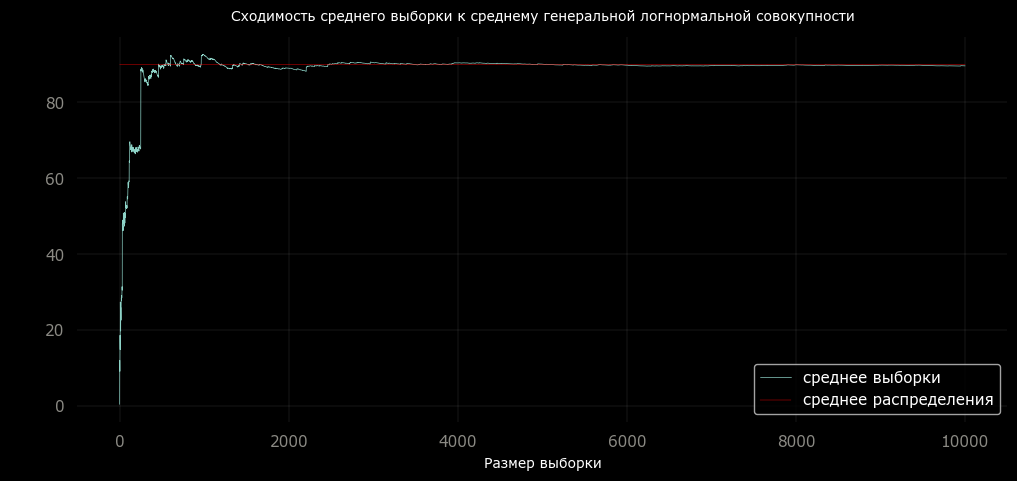

In [118]:
s = 3
lgd_mean = lognorm.stats(s, moments='m')
lgn = pd.Series([lognorm.rvs(s, size = n).mean() for n in range (1, 10001)]).to_frame()
lgn.columns=['res']
lgn['csum']=lgn['res'].cumsum()
lgn['num']=range(1,10001)
lgn['cmean']=lgn.csum/lgn.num

sns.lineplot(x = lgn.num, y = lgn.cmean, linewidth=0.5, label = 'среднее выборки')
sns.lineplot(x = lgn.num, y = np.array([lgd_mean]*10000), linewidth=0.3, color = 'red', label = 'среднее распределения')


plt.title('Сходимость среднего выборки к среднему генеральной логнормальной совокупности', fontsize=10, y=1.02)
plt.xlabel("Размер выборки", labelpad = 5, fontsize= 10)
plt.ylabel(' ', labelpad = 15, fontsize= 10)
plt.tick_params(axis='both', colors='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 
plt.show()



И все же средние средних сходятся к среднему распределения, хотя очень долго, нехотя и тяжело. Поскольку некоторые значения из хвостов не попадают в выборки даже при 10000 испытаниях - они не оказывают свое влияние на положение графика средних, но они учтены в расчете среднего распределения. И в таком случае средние сходятся параллельным курсом со средним совокупности, в ожидании того, когда же в очередной выборке попадется это значение из хвоста и схлопнет наконец эти два графика 

Таким образом каким бы ни было распределение - при увеличении размера выборки среднее выборки сходится к среднему распредления. При этом хвосты крайне осложняют и замедляют схождение.

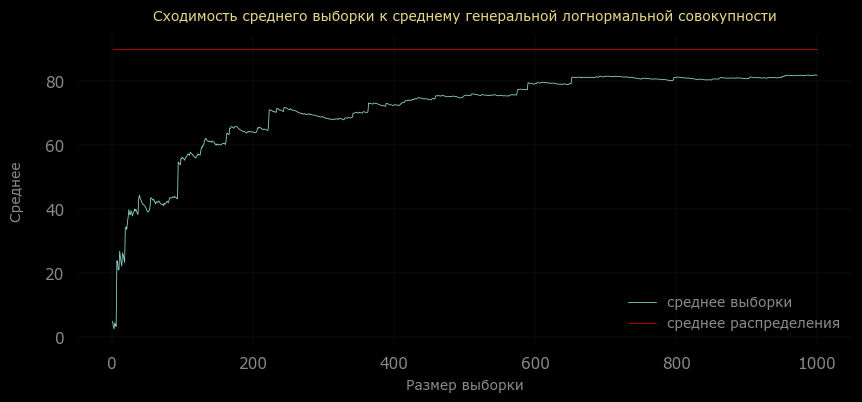

In [180]:
s = 3
lgd_mean = lognorm.stats(s, moments='m')
lgn = pd.Series([lognorm.rvs(s, size = n).mean() for n in range (1, 1001)]).to_frame()
lgn.columns=['res']
lgn['csum']=lgn['res'].cumsum()
lgn['num']=range(1,1001)
lgn['cmean']=lgn.csum/lgn.num

plt.figure(figsize=(10,4))

sns.lineplot(x = lgn.num, y = lgn.cmean, linewidth=0.6, label = 'среднее выборки')
sns.lineplot(x = lgn.num, y = np.array([lgd_mean]*1000), linewidth=0.5, color = 'red', label = 'среднее распределения')

plt.legend(frameon=False, fontsize='small', labelcolor = '#8b8a84')
plt.title('Сходимость среднего выборки к среднему генеральной логнормальной совокупности', fontsize=10, y=1.02, color = '#e7d688')
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlabel("Размер выборки", labelpad = 5, color='#8b8a84', fontsize= 10)
plt.ylabel('Среднее ', labelpad = 15, color='#8b8a84', fontsize= 10)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='#3f5b79', linestyle='-', linewidth=0.1) 
plt.show()


На масштабе в 1000 значений мы видим на графике ступеньки, которые показывают появление выборок, включающих значения из хвоста.

<a id="6"></a> Почему с увеличением выборки средние распределяются нормально?

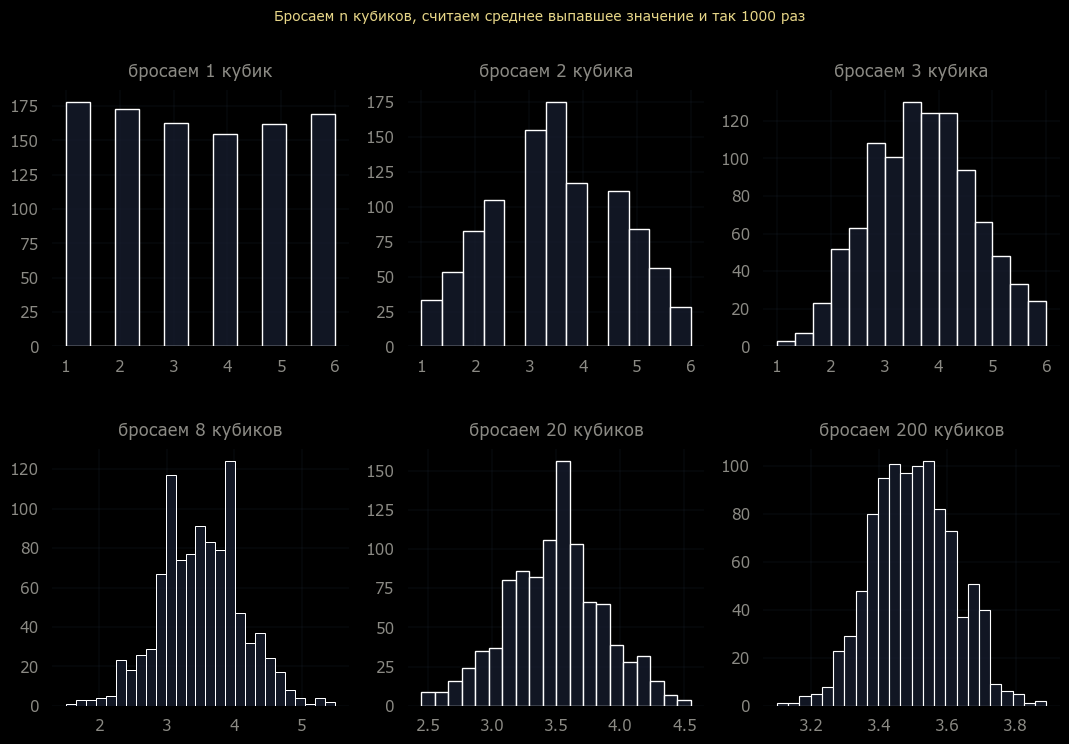

In [228]:
plt.figure(figsize=(13,8))
plt.subplots_adjust(wspace= 0.2, 
                    hspace= 0.4)
plt.suptitle('Бросаем n кубиков, считаем среднее выпавшее значение и так 1000 раз', fontsize=10, color='#e7d688')

plt.subplot(2, 3, 1)
sns.histplot([pd.Series([1,2,3,4,5,6]).sample(1,replace = True).mean() for _ in range(1000)], color='#171e2f')
plt.title('бросаем 1 кубик', fontsize=12, y=1.02, color='#8b8a84')
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlabel("", labelpad = 5, color='#8b8a84', fontsize= 10)
plt.ylabel('', labelpad = 15, color='#8b8a84', fontsize= 10)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='#3f5b79', linestyle='-', linewidth=0.1) 

plt.subplot(2, 3, 2)
sns.histplot([pd.Series([1,2,3,4,5,6]).sample(2,replace = True).mean() for _ in range(1000)], color='#171e2f')
plt.title('бросаем 2 кубика', fontsize=12, y=1.02, color='#8b8a84')
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlabel("", labelpad = 5, color='#8b8a84', fontsize= 10)
plt.ylabel('', labelpad = 15, color='#8b8a84', fontsize= 10)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='#3f5b79', linestyle='-', linewidth=0.1) 

plt.subplot(2, 3, 3)
sns.histplot([pd.Series([1,2,3,4,5,6]).sample(3,replace = True).mean() for _ in range(1000)], color='#171e2f')
plt.title('бросаем 3 кубика', fontsize=12, y=1.02, color='#8b8a84')
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlabel("", labelpad = 5, color='#8b8a84', fontsize= 10)
plt.ylabel('', labelpad = 15, color='#8b8a84', fontsize= 10)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='#3f5b79', linestyle='-', linewidth=0.1) 

plt.subplot(2, 3, 4)
sns.histplot([pd.Series([1,2,3,4,5,6]).sample(8,replace = True).mean() for _ in range(1000)], color='#171e2f')
plt.title('бросаем 8 кубиков', fontsize=12, y=1.02, color='#8b8a84')
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlabel("", labelpad = 5, color='#8b8a84', fontsize= 10)
plt.ylabel('', labelpad = 15, color='#8b8a84', fontsize= 10)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='#3f5b79', linestyle='-', linewidth=0.1) 

plt.subplot(2, 3, 5)
sns.histplot([pd.Series([1,2,3,4,5,6]).sample(20,replace = True).mean() for _ in range(1000)], color='#171e2f')
plt.title('бросаем 20 кубиков', fontsize=12, y=1.02, color='#8b8a84')
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlabel("", labelpad = 5, color='#8b8a84', fontsize= 10)
plt.ylabel('', labelpad = 15, color='#8b8a84', fontsize= 10)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='#3f5b79', linestyle='-', linewidth=0.1) 

plt.subplot(2, 3, 6)
sns.histplot([pd.Series([1,2,3,4,5,6]).sample(200,replace = True).mean() for _ in range(1000)],color='#171e2f')
plt.title('бросаем 200 кубиков', fontsize=12, y=1.02, color='#8b8a84')
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlabel("", labelpad = 5, color='#8b8a84', fontsize= 10)
plt.ylabel('', labelpad = 15, color='#8b8a84', fontsize= 10)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='#3f5b79', linestyle='-', linewidth=0.1) 

plt.show()

Среднее выпавших значений на кубиках - это сумма, нормированная на число брошенных кубиков, но в первую очередь это сумма.

Если мы бросаем 1 кубик, то равновероятено может оказаться только 1 число от 1 до 6 - потому что результат нормируется на 1 бросок, то есть остается собой

Если мы бросаем 2 кубика, то сумма 2 может получится только 1 способом - 1+1, а вот сумма 3 - уже двумя 1+2 и 2+1. То есть, среднее 1,5 получается уже не одним, а двумя способами: (1+2)/2 и (2+1)/2. А сумма 6 может получиться 1+5, 5+1, 2+4, 4+2, 3+3 - пятью способами. А сумма 12 - снова только одним способом - 6+6

Вот и получается, что чем дальше от крайних значений, то ближе к середине, тем бОльшим числом способов может быть получено одно и тоже среднее значение. Так и получается нормальное распределение средних. Края получаеются редко просто потому, что они воспроизводятся ограниченным числом комбинаций


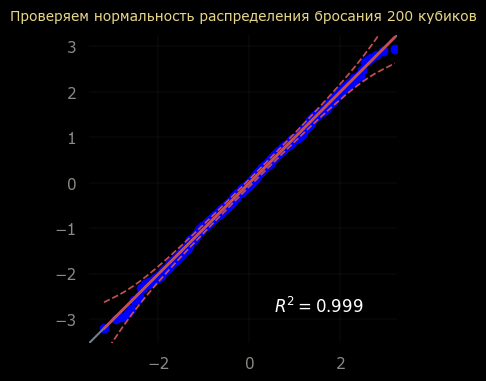

In [233]:
plt.figure(figsize=(10,4))

pg.qqplot([pd.Series([1,2,3,4,5,6]).sample(200,replace = True).mean() for _ in range(1000)])

plt.title('Проверяем нормальность распределения бросания 200 кубиков', fontsize=10, y=1.02, color = '#e7d688')
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlabel("", labelpad = 5, color='#8b8a84', fontsize= 10)
plt.ylabel('', labelpad = 15, color='#8b8a84', fontsize= 10)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='#3f5b79', linestyle='-', linewidth=0.1) 
plt.show()

И в самом деле распределение нормально